<h1> Дообучение модели MarkupLM-base по вертикали restaurant из набора SWDE.

Ссылка на набор [SWDE](http://web.archive.org/web/20210630013015/https://codeplexarchive.blob.core.windows.net/archive/projects/swde/swde.zip).

In [ ]:
# Delete previous folders we used

!rm -rf restaurant_true
!rm -rf restaurant

In [ ]:
# Устанавливаем необходимую версию PyTorch, чтобы избежать ненужных ошибок

!pip uninstall torch -y
!pip install torch==2.0.0

Found existing installation: torch 1.13.1+cu116
Uninstalling torch-1.13.1+cu116:
  Successfully uninstalled torch-1.13.1+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 KB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Устанавливаем сторонние пакеты для работы с трансформером MarkupLM

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git  # Transormers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 50.4 MB/s eta 0:00:00


In [ ]:
!pip install -q evaluate seqeval  # HuggingFace metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 5.5 MB/s eta 0:00:00


In [ ]:
# Подключаем Google-диск с уже загруженной вертикалью и разметкой

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Распаковываем архивы:

In [ ]:
!unzip /content/drive/MyDrive/SWDE/Restaurant/restaurant_true.zip

Archive:  /content/drive/MyDrive/SWDE/Restaurant/restaurant_true.zip
   creating: restaurant_true/
  inflating: restaurant_true/restaurant-fodors-address.txt  
  inflating: restaurant_true/restaurant-fodors-cuisine.txt  
  inflating: restaurant_true/restaurant-fodors-name.txt  
  inflating: restaurant_true/restaurant-fodors-phone.txt  
  inflating: restaurant_true/restaurant-frommers-address.txt  
  inflating: restaurant_true/restaurant-frommers-cuisine.txt  
  inflating: restaurant_true/restaurant-frommers-name.txt  
  inflating: restaurant_true/restaurant-frommers-phone.txt  
  inflating: restaurant_true/restaurant-gayot-address.txt  
  inflating: restaurant_true/restaurant-gayot-cuisine.txt  
  inflating: restaurant_true/restaurant-gayot-name.txt  
  inflating: restaurant_true/restaurant-gayot-phone.txt  
  inflating: restaurant_true/restaurant-opentable-address.txt  
  inflating: restaurant_true/restaurant-opentable-cuisine.txt  
  inflating: restaurant_true/restaurant-opentable-na

In [ ]:
!unzip /content/drive/MyDrive/SWDE/Restaurant/restaurant.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: restaurant/restaurant-opentable(2000)/0893.htm  
  inflating: restaurant/restaurant-opentable(2000)/0391.htm  
  inflating: restaurant/restaurant-opentable(2000)/1538.htm  
  inflating: restaurant/restaurant-opentable(2000)/1017.htm  
  inflating: restaurant/restaurant-opentable(2000)/1412.htm  
  inflating: restaurant/restaurant-opentable(2000)/1339.htm  
  inflating: restaurant/restaurant-opentable(2000)/1725.htm  
  inflating: restaurant/restaurant-opentable(2000)/1030.htm  
  inflating: restaurant/restaurant-opentable(2000)/0580.htm  
  inflating: restaurant/restaurant-opentable(2000)/0673.htm  
  inflating: restaurant/restaurant-opentable(2000)/1284.htm  
  inflating: restaurant/restaurant-opentable(2000)/1682.htm  
  inflating: restaurant/restaurant-opentable(2000)/1881.htm  
  inflating: restaurant/restaurant-opentable(2000)/1511.htm  
  inflating: restaurant/restaurant-opentable(2000)/0908.htm  
  

Введём переменные, в которых будем хранить номер и сами целевые переменные, а также "other" метку для остальных узлов из html-страниц. Также создадим переменные с 10 сайтами-агрегаторами ресторанов:

In [ ]:
# Целевые метки

basic_labels = ["name", "address", "phone", "cuisine", "other"]

labels_with_ids = {label:ind for ind, label in enumerate(basic_labels)}
ids_with_labels = {ind:label for label, ind in labels_with_ids.items()}

In [ ]:
print(labels_with_ids)
print("-----")
print(ids_with_labels)

{'name': 0, 'address': 1, 'phone': 2, 'cuisine': 3, 'other': 4}
-----
{0: 'name', 1: 'address', 2: 'phone', 3: 'cuisine', 4: 'other'}


In [ ]:
# Сайты-агрегаторы

websites = ["fodors", "frommers", "gayot", "opentable", "pickarestaurant", "restaurantica", "tripadvisor", "urbanspoon", "usdiners", "zagat"]
websites_with_ids = {website:ind for ind, website in enumerate(websites)}
ids_with_websites = {ind:website for website, ind in websites_with_ids.items()}

In [ ]:
print(websites_with_ids)
print("-----")
print(ids_with_websites)

{'fodors': 0, 'frommers': 1, 'gayot': 2, 'opentable': 3, 'pickarestaurant': 4, 'restaurantica': 5, 'tripadvisor': 6, 'urbanspoon': 7, 'usdiners': 8, 'zagat': 9}
-----
{0: 'fodors', 1: 'frommers', 2: 'gayot', 3: 'opentable', 4: 'pickarestaurant', 5: 'restaurantica', 6: 'tripadvisor', 7: 'urbanspoon', 8: 'usdiners', 9: 'zagat'}


Теперь получим все правильные метки.

In [ ]:
# MAY BE TO STRIP ADDRESS AND CUISINE!!!!


labels = {}

for website in websites:
    true_labels = []
    pathname = lambda label: f"/content/restaurant_true/restaurant-{website}-{label}.txt"
    # open files:
    with open(pathname("name"), 'r') as names, open(pathname("address"), 'r') as addresses, open(pathname("cuisine"), 'r') as cuisines, open(pathname("phone"), 'r') as phones:
        for i in range(2): # skip first 2 lines
            names.readline()
            addresses.readline()
            cuisines.readline()
            phones.readline()
        for i in range(2000):
            _, _, *name = names.readline().split()
            name = " ".join(name)
            _, _, *address = addresses.readline().split("\t")
            # address = " ".join(address)
            _, _, *cuisine = cuisines.readline().split("\t")
            # cuisine = " ".join(cuisine)
            _, _, *phone = phones.readline().split()
            phone = " ".join(phone)
            true_labels.append(
                {
                    "name": name,
                    "address": address,
                    "phone": phone,
                    "cuisine": cuisine
                }
            )
    labels[website] = true_labels

# print(len(labels))
# print(labels["fodors"])

Эксперименты будем проводить в следующем порядке:

1.   Сначала исследуем качество извлечения от числа страниц в обучающих данных на каждый сайт.
2.   Далее, исследуем качество извлечения в зависимости от числа сайтов в обучающих данных

Сначала выполним пункт 1.

Для этого нам необходимо зафиксировать некоторое количество сайтов-агрегаторов, а потом выбрать для каждого из них число страниц.

Предлагаем слудующий вариант:

*   Выбираем "среднее" число сайтов, а именно $k_0$ = 5
*   Далее нам необходимо варьировать число страниц на каждом сайте. Для того чтобы не перебирать все значения $n$ от 1 до 2000, предлагаем перебрать только значения по логарифмической шкале - это будут значения ниже.



In [ ]:
from numpy import exp, floor

k_0 = 5
n_values = []

power = 0
while (exponent := floor(exp(power))) <= 2000:
    n_values.append(int(exponent))
    power += 1

print(n_values)

[1, 2, 7, 20, 54, 148, 403, 1096]


Также проведём 10 экспериментов, в которых случайным образом будем выбирать 5 сайтов-агрегаторов, а их результаты усредним, чтобы иметь общее представление о зависимости качества извлечения от числа страниц.

In [ ]:
import numpy as np


seed = 20230403
rand_gen = np.random.default_rng(seed)


def get_perm_k_websites(k: int) -> tuple[np.ndarray, np.ndarray]:
    train_perm = np.ndarray(k, dtype=int)
    test_perm = np.ndarray(10 - k, dtype=int)
    permutation = rand_gen.permutation(10)
    train_perm[:] = permutation[:k]
    test_perm[:] = permutation[k:]
    return train_perm, test_perm

Контейнер, в котором будем хранить данные для обучения и тестирования.

In [ ]:
from torch.utils.data import Dataset

class MarkupLMDataset(Dataset):
    """Dataset for token classification with MarkupLM."""

    def __init__(self, data, processor=None, max_length=512):
        self.data = data
        self.processor = processor
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # first, get nodes, xpaths and node labels
        item = self.data[idx] # May be to delete!
        nodes, xpaths, node_labels = item['nodes'], item['xpaths'], item['node_labels']

        # provide to processor
        encoding = self.processor(nodes=nodes, xpaths=xpaths, node_labels=node_labels, padding="max_length",
                                  max_length=self.max_length, return_tensors="pt", truncation=True)

        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}

        return encoding

Функции для создания Dataloader для тренировки и обучения.

In [ ]:
from transformers import MarkupLMFeatureExtractor, MarkupLMProcessor
from torch.utils.data import DataLoader

feature_extractor = MarkupLMFeatureExtractor()
processor = MarkupLMProcessor.from_pretrained("microsoft/markuplm-base")
processor.parse_html = False


def get_data(website_perm: np.ndarray, page_num: int) -> list:
    data = []
    for id in website_perm:
        website = ids_with_websites[id]
        for page in rand_gen.integers(0, 2000, page_num):
            with open(f"/content/restaurant/restaurant-{website}(2000)/{page:04d}.htm") as html_page:
                html_code = html_page.read()
            encoding = feature_extractor(html_code)
            node_labels = [[]]
            for node_text in encoding['nodes'][0]:
                # do this with match! ( match <expr>: )
                if node_text == labels[website][page]["name"]:
                    node_labels[0].append(labels_with_ids["name"])
                elif node_text in labels[website][page]["address"]:
                    node_labels[0].append(labels_with_ids["address"])
                elif node_text == labels[website][page]["phone"]:
                    node_labels[0].append(labels_with_ids["phone"])
                elif node_text in labels[website][page]["cuisine"]:
                    node_labels[0].append(labels_with_ids["cuisine"])
                else:
                    node_labels[0].append(labels_with_ids["other"])
                
            data.append({'nodes': encoding['nodes'],
                        'xpaths': encoding['xpaths'],
                        'node_labels': node_labels})
    return data

In [ ]:
def get_dataloaders(train_perm: np.ndarray, train_pages: int,
                    test_perm: np.ndarray, test_pages: int) -> tuple[DataLoader, DataLoader]:
    train_data = get_data(train_perm, train_pages)
    train_dataset = MarkupLMDataset(data=train_data, processor=processor, max_length=512)
    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    
    test_data = get_data(test_perm, test_pages)
    test_dataset = MarkupLMDataset(data=test_data, processor=processor, max_length=512)
    test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)
    return train_dataloader, test_dataloader

In [ ]:
import evaluate


label_list = ["B-" + x for x in list(ids_with_labels.values())]


def get_labels(predictions, references):
    # Transform predictions and references tensos to numpy arrays
    if device.type == "cpu":
        y_pred = predictions.detach().clone().numpy()
        y_true = references.detach().clone().numpy()
    else:
        y_pred = predictions.detach().cpu().clone().numpy()
        y_true = references.detach().cpu().clone().numpy()

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(pred, gold_label) if l != -100]
        for pred, gold_label in zip(y_pred, y_true)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(pred, gold_label) if l != -100]
        for pred, gold_label in zip(y_pred, y_true)
    ]
    return true_predictions, true_labels

def compute_metrics(metric, return_entity_level_metrics=True):
    results = metric.compute()
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

Функция обучения модели.

In [ ]:
import torch
from torch.optim import AdamW
from pprint import PrettyPrinter


pp = PrettyPrinter(indent=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_model(model, dataloader: DataLoader, epoch_num: int, print_epoch: bool) -> None:
    optimizer = AdamW(model.parameters(), lr=5e-5, betas=(0.9, 0.98), eps=1e-6, weight_decay=0.01)
    model.to(device)
    model.train()
    for epoch in range(epoch_num):  # loop over the dataset multiple times
        metric = evaluate.load("seqeval")
        for batch in dataloader:
            inputs = {k:v.to(device) for k,v in batch.items()}
            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            predictions = outputs.logits.argmax(dim=-1)
            true_labels = batch["labels"]
            preds, refs = get_labels(predictions, true_labels)
            metric.add_batch(
                predictions=preds,
                references=refs,
            )

        eval_metric = compute_metrics(metric)
        if print_epoch:
            print(f"---Epoch {epoch + 1}:---")
            print("Loss:", loss.item())
            pp.pprint(eval_metric)

Функция тестирования модели.

In [ ]:
import gc


def test_model(model: any, dataloader: DataLoader) -> any:
    metric = evaluate.load("seqeval")
    for batch in dataloader:
        inputs = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**inputs)
        gc.collect()
        torch.cuda.empty_cache()
        predictions = outputs.logits.argmax(dim=-1)
        true_labels = batch["labels"]
        preds, refs = get_labels(predictions, true_labels)
        metric.add_batch(
            predictions=preds,
            references=refs,
        )
    eval_metric = compute_metrics(metric)
    # pp.pprint(eval_metric)
    return eval_metric


Теперь будем проводить сами эксперименты. В качестве тестовой выборки будем брать по 50 страниц с каждого сайта, не участвовавшего в обучении. \
Также возьмём количество эпох, равное 5.

Для каждого количества html-страниц будем проводить следующее число экспериментов: \
\begin{array}{ccc}
\text{pages}&\text{1}&\text{2}&\text{7}&\text{20}&\text{54}&\text{148}&\text{403}&\text{1096}\\
\text{n_experiments}&\text{10}&\text{10}&\text{9}&\text{8}&\text{6}&\text{5}&\text{4}&\text{3}\\
\end{array}

In [ ]:
from transformers import MarkupLMForTokenClassification


torch.cuda.empty_cache()
n_experiments = [10, 10, 9, 8, 6, 5, 4, 3]
all_f1 = []
f1_scores = []


for iter, page_num in enumerate(n_values):
    print(f"-----NUMBER OF PAGES : {page_num}-----")
    mean_f1_scores = []
    for experiment in range(n_experiments[iter]):
        print(f"-----EXPERIMENT NUMBER {experiment}-----")
        torch.cuda.empty_cache()
        train_perm, test_perm = get_perm_k_websites(k=k_0) # k_o = 5
        train_dataloader, test_dataloader = get_dataloaders(train_perm, page_num, test_perm, 50)
        # Training:
        model = MarkupLMForTokenClassification.from_pretrained("microsoft/markuplm-base", id2label=ids_with_labels, label2id=labels_with_ids)
        train_model(model, train_dataloader, 5, True)
        # Saving model:
        print(f"-----saving model!-----")
        torch.save(model.state_dict(), f"/content/drive/MyDrive/SWDE models/model_{page_num}_{experiment}")
        print(f"-----model saved!-----")
        # Testing:
        test_metric = test_model(model, test_dataloader)
        print(test_metric["overall_f1"])
        mean_f1_scores.append(sum([test_metric["address_f1"], test_metric["cuisine_f1"], \
                             test_metric["name_f1"], test_metric["phone_f1"]]) / 4)
    all_f1.append(mean_f1_scores)
    print(all_f1)
    f1_scores.append(sum(mean_f1_scores) / n_experiments[iter])
    print(f1_scores[-1])

-----NUMBER OF PAGES : 1-----
-----EXPERIMENT NUMBER 0-----


Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

/usr/local/lib/python3.9/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Epoch 1:---
Loss: 2.986062526702881
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.010282776349614395,
    'cuisine_number': 3,
    'cuisine_precision': 0.0051813471502590676,
    'cuisine_recall': 0.6666666666666666,
    'name_f1': 0.0,
    'name_number': 5,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.0,
    'other_number': 534,
    'other_precision': 0.0,
    'other_recall': 0.0,
    'overall_accuracy': 0.0036429872495446266,
    'overall_f1': 0.0036429872495446266,
    'overall_precision': 0.0036429872495446266,
    'overall_recall': 0.0036429872495446266,
    'phone_f1': 0.0,
    'phone_number': 3,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 1.7335169315338135
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.017316017316017316,
    'cuisine_number': 3,
    'cuisine_precisio

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 2.0523574352264404
{   'address_f1': 0.018750000000000003,
    'address_number': 6,
    'address_precision': 0.00946372239747634,
    'address_recall': 1.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 7,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 5,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.0,
    'other_number': 683,
    'other_precision': 0.0,
    'other_recall': 0.0,
    'overall_accuracy': 0.009915014164305949,
    'overall_f1': 0.009915014164305949,
    'overall_precision': 0.009915014164305949,
    'overall_recall': 0.009915014164305949,
    'phone_f1': 0.047619047619047616,
    'phone_number': 5,
    'phone_precision': 0.02702702702702703,
    'phone_recall': 0.2}
---Epoch 2:---
Loss: 1.1328893899917603
{   'address_f1': 0.05025125628140703,
    'address_number': 6,
    'address_precision': 0.025906735751295335,
    'address_recall': 0.8333333333333334,
    'cuisine_f1': 0.0,
  

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.8310998678207397
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 6,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 5,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.00946372239747634,
    'other_number': 631,
    'other_precision': 1.0,
    'other_recall': 0.004754358161648178,
    'overall_accuracy': 0.010802469135802469,
    'overall_f1': 0.010802469135802469,
    'overall_precision': 0.010802469135802469,
    'overall_recall': 0.010802469135802469,
    'phone_f1': 0.013266998341625208,
    'phone_number': 4,
    'phone_precision': 0.00667779632721202,
    'phone_recall': 1.0}
---Epoch 2:---
Loss: 0.9354881048202515
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 6,
    'cuisine_precision': 

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.8505043983459473
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 1,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.015337423312883437,
    'name_number': 5,
    'name_precision': 0.0077279752704791345,
    'name_recall': 1.0,
    'other_f1': 0.02395209580838323,
    'other_number': 660,
    'other_precision': 1.0,
    'other_recall': 0.012121212121212121,
    'overall_accuracy': 0.019287833827893175,
    'overall_f1': 0.019287833827893175,
    'overall_precision': 0.019287833827893175,
    'overall_recall': 0.019287833827893175,
    'phone_f1': 0.0,
    'phone_number': 4,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.8860836029052734
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 1,
    'cuisine_precision'

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.5419628620147705
{   'address_f1': 0.041811846689895474,
    'address_number': 12,
    'address_precision': 0.021352313167259787,
    'address_recall': 1.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 7,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 5,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.13183279742765272,
    'other_number': 581,
    'other_precision': 1.0,
    'other_recall': 0.07056798623063683,
    'overall_accuracy': 0.08717105263157894,
    'overall_f1': 0.08717105263157894,
    'overall_precision': 0.08717105263157894,
    'overall_recall': 0.08717105263157894,
    'phone_f1': 0.0,
    'phone_number': 3,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.7067338824272156
{   'address_f1': 0.0,
    'address_number': 12,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 7,
    'cuisine_precision': 0.

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.7362666130065918
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0049261083743842365,
    'cuisine_number': 2,
    'cuisine_precision': 0.0024752475247524753,
    'cuisine_recall': 0.5,
    'name_f1': 0.0,
    'name_number': 9,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.1035058430717863,
    'other_number': 567,
    'other_precision': 0.96875,
    'other_recall': 0.054673721340388004,
    'overall_accuracy': 0.05650684931506849,
    'overall_f1': 0.05650684931506849,
    'overall_precision': 0.05650684931506849,
    'overall_recall': 0.05650684931506849,
    'phone_f1': 0.05263157894736842,
    'phone_number': 4,
    'phone_precision': 0.029411764705882353,
    'phone_recall': 0.25}
---Epoch 2:---
Loss: 0.8187224268913269
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_n

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.2268970012664795
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 4,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 7,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.7948969578017663,
    'other_number': 590,
    'other_precision': 0.9440559440559441,
    'other_recall': 0.6864406779661016,
    'overall_accuracy': 0.6574675324675324,
    'overall_f1': 0.6574675324675324,
    'overall_precision': 0.6574675324675324,
    'overall_recall': 0.6574675324675324,
    'phone_f1': 0.0,
    'phone_number': 4,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.6144256591796875
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 4,
    'cuisine_precision': 0.0,
    'cuisine_recall': 

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.4653611183166504
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0223463687150838,
    'cuisine_number': 4,
    'cuisine_precision': 0.011299435028248588,
    'cuisine_recall': 1.0,
    'name_f1': 0.0,
    'name_number': 4,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.551219512195122,
    'other_number': 594,
    'other_precision': 1.0,
    'other_recall': 0.38047138047138046,
    'overall_accuracy': 0.3782894736842105,
    'overall_f1': 0.37828947368421045,
    'overall_precision': 0.3782894736842105,
    'overall_recall': 0.3782894736842105,
    'phone_f1': 0.0,
    'phone_number': 4,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.695843517780304
{   'address_f1': 0.0,
    'address_number': 2,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 4,
    'cuisine_precision': 0.0,
    'cu

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.5340040922164917
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.021052631578947368,
    'cuisine_number': 3,
    'cuisine_precision': 0.010869565217391304,
    'cuisine_recall': 0.3333333333333333,
    'name_f1': 0.03773584905660377,
    'name_number': 6,
    'name_precision': 0.019305019305019305,
    'name_recall': 0.8333333333333334,
    'other_f1': 0.33691756272401435,
    'other_number': 458,
    'other_precision': 0.94,
    'other_recall': 0.2052401746724891,
    'overall_accuracy': 0.21141649048625794,
    'overall_f1': 0.21141649048625794,
    'overall_precision': 0.21141649048625794,
    'overall_recall': 0.21141649048625794,
    'phone_f1': 0.0,
    'phone_number': 2,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.7336542010307312
{   'address_f1': 0.0,
    'address_number': 4,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 2.245879650115967
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 5,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.01824817518248175,
    'name_number': 8,
    'name_precision': 0.009259259259259259,
    'name_recall': 0.625,
    'other_f1': 0.0,
    'other_number': 564,
    'other_precision': 0.0,
    'other_recall': 0.0,
    'overall_accuracy': 0.008445945945945946,
    'overall_f1': 0.008445945945945946,
    'overall_precision': 0.008445945945945946,
    'overall_recall': 0.008445945945945946,
    'phone_f1': 0.0,
    'phone_number': 4,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 1.2648110389709473
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 5,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.4638700485229492
{   'address_f1': 0.01733102253032929,
    'address_number': 13,
    'address_precision': 0.008865248226950355,
    'address_recall': 0.38461538461538464,
    'cuisine_f1': 0.0,
    'cuisine_number': 9,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 9,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.5254237288135593,
    'other_number': 1114,
    'other_precision': 0.9595238095238096,
    'other_recall': 0.3617594254937163,
    'overall_accuracy': 0.3538594969644406,
    'overall_f1': 0.3538594969644406,
    'overall_precision': 0.3538594969644406,
    'overall_recall': 0.3538594969644406,
    'phone_f1': 0.0,
    'phone_number': 8,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.6834830045700073
{   'address_f1': 0.0,
    'address_number': 13,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 9,
  

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.5579911470413208
{   'address_f1': 0.0,
    'address_number': 14,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.026785714285714288,
    'cuisine_number': 7,
    'cuisine_precision': 0.013824884792626729,
    'cuisine_recall': 0.42857142857142855,
    'name_f1': 0.027972027972027972,
    'name_number': 16,
    'name_precision': 0.014251781472684086,
    'name_recall': 0.75,
    'other_f1': 0.16264090177133658,
    'other_number': 1130,
    'other_precision': 0.9017857142857143,
    'other_recall': 0.08938053097345133,
    'overall_accuracy': 0.09880749574105621,
    'overall_f1': 0.09880749574105621,
    'overall_precision': 0.09880749574105621,
    'overall_recall': 0.09880749574105621,
    'phone_f1': 0.0,
    'phone_number': 7,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.776590883731842
{   'address_f1': 0.0,
    'address_number': 14,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cui

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.3808624744415283
{   'address_f1': 0.012658227848101266,
    'address_number': 14,
    'address_precision': 0.006521739130434782,
    'address_recall': 0.21428571428571427,
    'cuisine_f1': 0.0,
    'cuisine_number': 13,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 16,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.6129994036970782,
    'other_number': 1133,
    'other_precision': 0.9448529411764706,
    'other_recall': 0.45366284201235657,
    'overall_accuracy': 0.43591905564924116,
    'overall_f1': 0.4359190556492411,
    'overall_precision': 0.43591905564924116,
    'overall_recall': 0.43591905564924116,
    'phone_f1': 0.0,
    'phone_number': 10,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.6831307411193848
{   'address_f1': 0.0,
    'address_number': 14,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.1201040744781494
{   'address_f1': 0.0,
    'address_number': 24,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 10,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 8,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.8296514482081492,
    'other_number': 1154,
    'other_precision': 0.956964892412231,
    'other_recall': 0.7322357019064125,
    'overall_accuracy': 0.7023217247097844,
    'overall_f1': 0.7023217247097844,
    'overall_precision': 0.7023217247097844,
    'overall_recall': 0.7023217247097844,
    'phone_f1': 0.012195121951219513,
    'phone_number': 10,
    'phone_precision': 0.006289308176100629,
    'phone_recall': 0.2}
---Epoch 2:---
Loss: 0.5592884421348572
{   'address_f1': 0.0,
    'address_number': 24,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 10,
    'cuisine_pr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.4381884336471558
{   'address_f1': 0.004434589800443459,
    'address_number': 5,
    'address_precision': 0.002242152466367713,
    'address_recall': 0.2,
    'cuisine_f1': 0.0,
    'cuisine_number': 8,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 12,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.458254865034526,
    'other_number': 1220,
    'other_precision': 0.9785522788203753,
    'other_recall': 0.29918032786885246,
    'overall_accuracy': 0.2944932162809258,
    'overall_f1': 0.2944932162809258,
    'overall_precision': 0.2944932162809258,
    'overall_recall': 0.2944932162809258,
    'phone_f1': 0.014925373134328356,
    'phone_number': 8,
    'phone_precision': 0.007614213197969543,
    'phone_recall': 0.375}
---Epoch 2:---
Loss: 0.6864508986473083
{   'address_f1': 0.0,
    'address_number': 5,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cu

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 2.3154139518737793
{   'address_f1': 0.0,
    'address_number': 12,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.017429193899782137,
    'cuisine_number': 10,
    'cuisine_precision': 0.00881057268722467,
    'cuisine_recall': 0.8,
    'name_f1': 0.0,
    'name_number': 7,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.0,
    'other_number': 1138,
    'other_precision': 0.0,
    'other_recall': 0.0,
    'overall_accuracy': 0.008517887563884156,
    'overall_f1': 0.008517887563884156,
    'overall_precision': 0.008517887563884156,
    'overall_recall': 0.008517887563884156,
    'phone_f1': 0.016736401673640166,
    'phone_number': 7,
    'phone_precision': 0.008620689655172414,
    'phone_recall': 0.2857142857142857}
---Epoch 2:---
Loss: 1.255852460861206
{   'address_f1': 0.0,
    'address_number': 12,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.029411764705882353,
    'cuisine_n

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.7667616605758667
{   'address_f1': 0.01680672268907563,
    'address_number': 11,
    'address_precision': 0.008561643835616438,
    'address_recall': 0.45454545454545453,
    'cuisine_f1': 0.022026431718061675,
    'cuisine_number': 9,
    'cuisine_precision': 0.011235955056179775,
    'cuisine_recall': 0.5555555555555556,
    'name_f1': 0.0,
    'name_number': 16,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.051233396584440226,
    'other_number': 1025,
    'other_precision': 0.9310344827586207,
    'other_recall': 0.026341463414634145,
    'overall_accuracy': 0.03464419475655431,
    'overall_f1': 0.03464419475655431,
    'overall_precision': 0.03464419475655431,
    'overall_recall': 0.03464419475655431,
    'phone_f1': 0.0,
    'phone_number': 7,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.9020525217056274
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.8406277894973755
{   'address_f1': 0.02666666666666667,
    'address_number': 19,
    'address_precision': 0.014563106796116505,
    'address_recall': 0.15789473684210525,
    'cuisine_f1': 0.0,
    'cuisine_number': 11,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.03565640194489465,
    'name_number': 14,
    'name_precision': 0.01824212271973466,
    'name_recall': 0.7857142857142857,
    'other_f1': 0.0958570268074736,
    'other_number': 1171,
    'other_precision': 0.9833333333333333,
    'other_recall': 0.05038428693424424,
    'overall_accuracy': 0.062244062244062245,
    'overall_f1': 0.062244062244062245,
    'overall_precision': 0.062244062244062245,
    'overall_recall': 0.062244062244062245,
    'phone_f1': 0.017595307917888565,
    'phone_number': 6,
    'phone_precision': 0.008955223880597015,
    'phone_recall': 0.5}
---Epoch 2:---
Loss: 0.9169226884841919
{   'address_f1': 0.0,
    'address_number': 19,
    'address_pr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.4974044561386108
{   'address_f1': 0.0,
    'address_number': 18,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 9,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 9,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.4840182648401826,
    'other_number': 1319,
    'other_precision': 0.9792147806004619,
    'other_recall': 0.3214556482183472,
    'overall_accuracy': 0.315018315018315,
    'overall_f1': 0.315018315018315,
    'overall_precision': 0.315018315018315,
    'overall_recall': 0.315018315018315,
    'phone_f1': 0.016643550624133148,
    'phone_number': 10,
    'phone_precision': 0.008438818565400843,
    'phone_recall': 0.6}
---Epoch 2:---
Loss: 0.7555192112922668
{   'address_f1': 0.0,
    'address_number': 18,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 9,
    'cuisine_precisi

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 1.9250742197036743
{   'address_f1': 0.026755852842809364,
    'address_number': 19,
    'address_precision': 0.013816925734024179,
    'address_recall': 0.42105263157894735,
    'cuisine_f1': 0.031496062992125984,
    'cuisine_number': 9,
    'cuisine_precision': 0.01694915254237288,
    'cuisine_recall': 0.2222222222222222,
    'name_f1': 0.01727861771058315,
    'name_number': 16,
    'name_precision': 0.008948545861297539,
    'name_recall': 0.25,
    'other_f1': 0.03842794759825328,
    'other_number': 1121,
    'other_precision': 0.9166666666666666,
    'other_recall': 0.019625334522747548,
    'overall_accuracy': 0.030742954739538857,
    'overall_f1': 0.030742954739538857,
    'overall_precision': 0.030742954739538857,
    'overall_recall': 0.030742954739538857,
    'phone_f1': 0.0,
    'phone_number': 6,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 1.0660520792007446
{   'address_f1': 0.0,
    'address_number': 19,
    'address

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.3467281758785248
{   'address_f1': 0.02331002331002331,
    'address_number': 60,
    'address_precision': 0.013550135501355014,
    'address_recall': 0.08333333333333333,
    'cuisine_f1': 0.0,
    'cuisine_number': 35,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.06037735849056604,
    'name_number': 40,
    'name_precision': 0.035555555555555556,
    'name_recall': 0.2,
    'other_f1': 0.7168890335177351,
    'other_number': 3866,
    'other_precision': 0.9662280701754385,
    'other_recall': 0.5698396275219866,
    'overall_accuracy': 0.5524353876739563,
    'overall_f1': 0.5524353876739563,
    'overall_precision': 0.5524353876739563,
    'overall_recall': 0.5524353876739563,
    'phone_f1': 0.011986301369863015,
    'phone_number': 23,
    'phone_precision': 0.00611353711790393,
    'phone_recall': 0.30434782608695654}
---Epoch 2:---
Loss: 0.2520679235458374
{   'address_f1': 0.0,
    'address_number': 60,
    'address_precision

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.6111899614334106
{   'address_f1': 0.0,
    'address_number': 28,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.021220159151193636,
    'cuisine_number': 35,
    'cuisine_precision': 0.010810810810810811,
    'cuisine_recall': 0.5714285714285714,
    'name_f1': 0.003976143141153081,
    'name_number': 38,
    'name_precision': 0.002150537634408602,
    'name_recall': 0.02631578947368421,
    'other_f1': 0.648807771563144,
    'other_number': 4538,
    'other_precision': 0.9769503546099291,
    'other_recall': 0.48567650947553986,
    'overall_accuracy': 0.47696593100492823,
    'overall_f1': 0.47696593100492823,
    'overall_precision': 0.47696593100492823,
    'overall_recall': 0.47696593100492823,
    'phone_f1': 0.023255813953488372,
    'phone_number': 28,
    'phone_precision': 0.017241379310344827,
    'phone_recall': 0.03571428571428571}
---Epoch 2:---
Loss: 0.32526278495788574
{   'address_f1': 0.0,
    'address_number': 28,

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.41443851590156555
{   'address_f1': 0.0,
    'address_number': 39,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.011128775834658189,
    'cuisine_number': 32,
    'cuisine_precision': 0.005709624796084829,
    'cuisine_recall': 0.21875,
    'name_f1': 0.0,
    'name_number': 36,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.7229381443298968,
    'other_number': 4868,
    'other_precision': 0.9699170124481328,
    'other_recall': 0.5762119967132292,
    'overall_accuracy': 0.5612774451097804,
    'overall_f1': 0.5612774451097804,
    'overall_precision': 0.5612774451097804,
    'overall_recall': 0.5612774451097804,
    'phone_f1': 0.0,
    'phone_number': 35,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.32035180926322937
{   'address_f1': 0.0,
    'address_number': 39,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 32,
    'cu

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.41371992230415344
{   'address_f1': 0.0321285140562249,
    'address_number': 66,
    'address_precision': 0.016696481812760882,
    'address_recall': 0.42424242424242425,
    'cuisine_f1': 0.0,
    'cuisine_number': 32,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 39,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.7044266294876264,
    'other_number': 3628,
    'other_precision': 0.9578199052132701,
    'other_recall': 0.5570562293274531,
    'overall_accuracy': 0.5403481012658228,
    'overall_f1': 0.5403481012658228,
    'overall_precision': 0.5403481012658228,
    'overall_recall': 0.5403481012658228,
    'phone_f1': 0.0,
    'phone_number': 27,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.2184114158153534
{   'address_f1': 0.0,
    'address_number': 66,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 32

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.44423189759254456
{   'address_f1': 0.0,
    'address_number': 56,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.011428571428571429,
    'cuisine_number': 34,
    'cuisine_precision': 0.006329113924050633,
    'cuisine_recall': 0.058823529411764705,
    'name_f1': 0.0,
    'name_number': 47,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9048625792811839,
    'other_number': 3473,
    'other_precision': 0.9514131470308034,
    'other_recall': 0.8626547653325655,
    'overall_accuracy': 0.8236263736263736,
    'overall_f1': 0.8236263736263737,
    'overall_precision': 0.8236263736263736,
    'overall_recall': 0.8236263736263736,
    'phone_f1': 0.0,
    'phone_number': 30,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.17639243602752686
{   'address_f1': 0.0,
    'address_number': 56,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number'

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.5831330418586731
{   'address_f1': 0.04424778761061947,
    'address_number': 85,
    'address_precision': 0.023923444976076555,
    'address_recall': 0.29411764705882354,
    'cuisine_f1': 0.019230769230769232,
    'cuisine_number': 31,
    'cuisine_precision': 0.009883198562443846,
    'cuisine_recall': 0.3548387096774194,
    'name_f1': 0.0,
    'name_number': 48,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.5157670729348036,
    'other_number': 3795,
    'other_precision': 0.970160116448326,
    'other_recall': 0.3512516469038208,
    'overall_accuracy': 0.34493987975951906,
    'overall_f1': 0.34493987975951906,
    'overall_precision': 0.34493987975951906,
    'overall_recall': 0.34493987975951906,
    'phone_f1': 0.032454361054766734,
    'phone_number': 33,
    'phone_precision': 0.017391304347826087,
    'phone_recall': 0.24242424242424243}
---Epoch 2:---
Loss: 0.3027958273887634
{   'address_f1': 0.0,
    'address_number': 85,
  

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.27197015285491943
{   'address_f1': 0.0,
    'address_number': 14,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 26,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.026044492674986437,
    'name_number': 42,
    'name_precision': 0.013325930038867296,
    'name_recall': 0.5714285714285714,
    'other_f1': 0.6739169192369405,
    'other_number': 3669,
    'other_precision': 0.9742268041237113,
    'other_recall': 0.5151267375306623,
    'overall_accuracy': 0.5074231177094379,
    'overall_f1': 0.5074231177094379,
    'overall_precision': 0.5074231177094379,
    'overall_recall': 0.5074231177094379,
    'phone_f1': 0.0,
    'phone_number': 21,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.1678001880645752
{   'address_f1': 0.0,
    'address_number': 14,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 2

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.4645968973636627
{   'address_f1': 0.0,
    'address_number': 73,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.027153160797624098,
    'cuisine_number': 37,
    'cuisine_precision': 0.013793103448275862,
    'cuisine_recall': 0.8648648648648649,
    'name_f1': 0.0,
    'name_number': 46,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.5591606133979016,
    'other_number': 4409,
    'other_precision': 0.9697648376259799,
    'other_recall': 0.39283284191426626,
    'overall_accuracy': 0.3834782608695652,
    'overall_f1': 0.3834782608695652,
    'overall_precision': 0.3834782608695652,
    'overall_recall': 0.3834782608695652,
    'phone_f1': 0.0,
    'phone_number': 35,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.3123299479484558
{   'address_f1': 0.0,
    'address_number': 73,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 3

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.3422406315803528
{   'address_f1': 0.006878761822871883,
    'address_number': 11,
    'address_precision': 0.0034557235421166306,
    'address_recall': 0.7272727272727273,
    'cuisine_f1': 0.0,
    'cuisine_number': 20,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 53,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.6194749086075109,
    'other_number': 4123,
    'other_precision': 0.9836411609498681,
    'other_recall': 0.4520979869027407,
    'overall_accuracy': 0.44286728176011353,
    'overall_f1': 0.44286728176011353,
    'overall_precision': 0.44286728176011353,
    'overall_recall': 0.44286728176011353,
    'phone_f1': 0.0,
    'phone_number': 20,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.12475699186325073
{   'address_f1': 0.0,
    'address_number': 11,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_numbe

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.31056955456733704
{   'address_f1': 0.0,
    'address_number': 172,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.032258064516129024,
    'cuisine_number': 86,
    'cuisine_precision': 0.03,
    'cuisine_recall': 0.03488372093023256,
    'name_f1': 0.005115089514066496,
    'name_number': 108,
    'name_precision': 0.0028169014084507044,
    'name_recall': 0.027777777777777776,
    'other_f1': 0.8740102929532858,
    'other_number': 11039,
    'other_precision': 0.9631366561238958,
    'other_recall': 0.7999818824168856,
    'overall_accuracy': 0.7702220287331302,
    'overall_f1': 0.7702220287331302,
    'overall_precision': 0.7702220287331302,
    'overall_recall': 0.7702220287331302,
    'phone_f1': 0.015437392795883362,
    'phone_number': 80,
    'phone_precision': 0.008287292817679558,
    'phone_recall': 0.1125}
---Epoch 2:---
Loss: 0.22046177089214325
{   'address_f1': 0.0,
    'address_number': 172,
    'address_precision':

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.1907682567834854
{   'address_f1': 0.0,
    'address_number': 86,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.013840830449826988,
    'cuisine_number': 80,
    'cuisine_precision': 0.009569377990430622,
    'cuisine_recall': 0.025,
    'name_f1': 0.013745704467353952,
    'name_number': 175,
    'name_precision': 0.017241379310344827,
    'name_recall': 0.011428571428571429,
    'other_f1': 0.8981346242123274,
    'other_number': 12848,
    'other_precision': 0.9681511470985156,
    'other_recall': 0.8375622665006227,
    'overall_accuracy': 0.811906556141673,
    'overall_f1': 0.811906556141673,
    'overall_precision': 0.811906556141673,
    'overall_recall': 0.811906556141673,
    'phone_f1': 0.009419152276295134,
    'phone_number': 81,
    'phone_precision': 0.004918032786885246,
    'phone_recall': 0.1111111111111111}
---Epoch 2:---
Loss: 0.2076202929019928
{   'address_f1': 0.0,
    'address_number': 86,
    'address_precis

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.18154391646385193
{   'address_f1': 0.0,
    'address_number': 180,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.036231884057971016,
    'cuisine_number': 121,
    'cuisine_precision': 0.03225806451612903,
    'cuisine_recall': 0.04132231404958678,
    'name_f1': 0.0,
    'name_number': 126,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.8982963345379453,
    'other_number': 11302,
    'other_precision': 0.9565217391304348,
    'other_recall': 0.8467527871173244,
    'overall_accuracy': 0.8105387803433984,
    'overall_f1': 0.8105387803433985,
    'overall_precision': 0.8105387803433984,
    'overall_recall': 0.8105387803433984,
    'phone_f1': 0.009221902017291067,
    'phone_number': 94,
    'phone_precision': 0.004875076173065204,
    'phone_recall': 0.0851063829787234}
---Epoch 2:---
Loss: 0.2390129119157791
{   'address_f1': 0.0,
    'address_number': 180,
    'address_precision': 0.0,
    'address_recall

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.28548184037208557
{   'address_f1': 0.04509090909090909,
    'address_number': 154,
    'address_precision': 0.025389025389025387,
    'address_recall': 0.2012987012987013,
    'cuisine_f1': 0.0,
    'cuisine_number': 101,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.020512820512820513,
    'name_number': 117,
    'name_precision': 0.02564102564102564,
    'name_recall': 0.017094017094017096,
    'other_f1': 0.8957674219752032,
    'other_number': 12566,
    'other_precision': 0.967849223946785,
    'other_recall': 0.8336781792137514,
    'overall_accuracy': 0.8073732718894009,
    'overall_f1': 0.8073732718894009,
    'overall_precision': 0.8073732718894009,
    'overall_recall': 0.8073732718894009,
    'phone_f1': 0.011673151750972763,
    'phone_number': 82,
    'phone_precision': 0.006944444444444444,
    'phone_recall': 0.036585365853658534}
---Epoch 2:---
Loss: 0.1996382772922516
{   'address_f1': 0.0,
    'address_number': 154,

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.17123381793498993
{   'address_f1': 0.0,
    'address_number': 149,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 105,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.02332979851537646,
    'name_number': 128,
    'name_precision': 0.012514220705346985,
    'name_recall': 0.171875,
    'other_f1': 0.9138950331791675,
    'other_number': 13108,
    'other_precision': 0.9664029939610445,
    'other_recall': 0.8667989014342387,
    'overall_accuracy': 0.8386621482245469,
    'overall_f1': 0.8386621482245469,
    'overall_precision': 0.8386621482245469,
    'overall_recall': 0.8386621482245469,
    'phone_f1': 0.0,
    'phone_number': 84,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.23351283371448517
{   'address_f1': 0.0,
    'address_number': 149,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 105,
 

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.17137624323368073
{   'address_f1': 0.0,
    'address_number': 186,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.03550295857988166,
    'cuisine_number': 77,
    'cuisine_precision': 0.022988505747126436,
    'cuisine_recall': 0.07792207792207792,
    'name_f1': 0.0,
    'name_number': 129,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9585293883084776,
    'other_number': 12627,
    'other_precision': 0.9653039916472572,
    'other_recall': 0.9518492120060188,
    'overall_accuracy': 0.9186135287830203,
    'overall_f1': 0.9186135287830203,
    'overall_precision': 0.9186135287830203,
    'overall_recall': 0.9186135287830203,
    'phone_f1': 0.030501089324618733,
    'phone_number': 79,
    'phone_precision': 0.018421052631578946,
    'phone_recall': 0.08860759493670886}
---Epoch 2:---
Loss: 0.1453668624162674
{   'address_f1': 0.0,
    'address_number': 186,
    'address_precision': 0.0,
    'address_recall

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.24565881490707397
{   'address_f1': 0.0,
    'address_number': 229,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 123,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 118,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.8953991949864982,
    'other_number': 10391,
    'other_precision': 0.9513858813339108,
    'other_recall': 0.8456356462323165,
    'overall_accuracy': 0.8038696723555718,
    'overall_f1': 0.8038696723555718,
    'overall_precision': 0.8038696723555718,
    'overall_recall': 0.8038696723555718,
    'phone_f1': 0.024347826086956525,
    'phone_number': 96,
    'phone_precision': 0.01289134438305709,
    'phone_recall': 0.21875}
---Epoch 2:---
Loss: 0.20399989187717438
{   'address_f1': 0.2406015037593985,
    'address_number': 229,
    'address_precision': 0.8648648648648649,
    'address_recall': 0.13973799126637554,
    'c

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.15615764260292053
{   'address_f1': 0.0,
    'address_number': 104,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.003629764065335753,
    'cuisine_number': 69,
    'cuisine_precision': 0.001936108422071636,
    'cuisine_recall': 0.028985507246376812,
    'name_f1': 0.0,
    'name_number': 146,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9407930024342948,
    'other_number': 12470,
    'other_precision': 0.9688960652672729,
    'other_recall': 0.9142742582197273,
    'overall_accuracy': 0.8871168507857476,
    'overall_f1': 0.8871168507857476,
    'overall_precision': 0.8871168507857476,
    'overall_recall': 0.8871168507857476,
    'phone_f1': 0.0,
    'phone_number': 65,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.16535301506519318
{   'address_f1': 0.0,
    'address_number': 104,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_num

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.1610177755355835
{   'address_f1': 0.0778523489932886,
    'address_number': 573,
    'address_precision': 0.1686046511627907,
    'address_recall': 0.0506108202443281,
    'cuisine_f1': 0.0036900369003690036,
    'cuisine_number': 326,
    'cuisine_precision': 0.004629629629629629,
    'cuisine_recall': 0.003067484662576687,
    'name_f1': 0.0,
    'name_number': 320,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9630077410038117,
    'other_number': 29486,
    'other_precision': 0.9537033957494928,
    'other_recall': 0.9724954215559927,
    'overall_accuracy': 0.9280333645856907,
    'overall_f1': 0.9280333645856907,
    'overall_precision': 0.9280333645856907,
    'overall_recall': 0.9280333645856907,
    'phone_f1': 0.0,
    'phone_number': 226,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.02817011997103691
{   'address_f1': 0.7818853974121995,
    'address_number': 573,
    'address_precision': 0.8310412

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.12283811718225479
{   'address_f1': 0.015915119363395226,
    'address_number': 139,
    'address_precision': 0.012605042016806723,
    'address_recall': 0.02158273381294964,
    'cuisine_f1': 0.010050251256281407,
    'cuisine_number': 165,
    'cuisine_precision': 0.006339144215530904,
    'cuisine_recall': 0.024242424242424242,
    'name_f1': 0.0,
    'name_number': 332,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9647074839192731,
    'other_number': 29657,
    'other_precision': 0.9737881754783744,
    'other_recall': 0.955794584752335,
    'overall_accuracy': 0.931118261212161,
    'overall_f1': 0.931118261212161,
    'overall_precision': 0.931118261212161,
    'overall_recall': 0.931118261212161,
    'phone_f1': 0.026119402985074626,
    'phone_number': 165,
    'phone_precision': 0.018867924528301886,
    'phone_recall': 0.04242424242424243}
---Epoch 2:---
Loss: 0.03636118024587631
{   'address_f1': 0.02816901408450704,
    'addre

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.12189778685569763
{   'address_f1': 0.15384615384615385,
    'address_number': 489,
    'address_precision': 0.5301204819277109,
    'address_recall': 0.08997955010224949,
    'cuisine_f1': 0.0,
    'cuisine_number': 297,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.02417302798982188,
    'name_number': 319,
    'name_precision': 0.015163607342378291,
    'name_recall': 0.05956112852664577,
    'other_f1': 0.9569679996588145,
    'other_number': 35447,
    'other_precision': 0.9645231545162769,
    'other_recall': 0.949530284650323,
    'overall_accuracy': 0.9159378564832419,
    'overall_f1': 0.9159378564832419,
    'overall_precision': 0.9159378564832419,
    'overall_recall': 0.9159378564832419,
    'phone_f1': 0.009433962264150943,
    'phone_number': 266,
    'phone_precision': 0.012658227848101266,
    'phone_recall': 0.007518796992481203}
---Epoch 2:---
Loss: 0.04171864315867424
{   'address_f1': 0.6589147286821705,
    'addres

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.2005337029695511
{   'address_f1': 0.015732546705998034,
    'address_number': 314,
    'address_precision': 0.011379800853485065,
    'address_recall': 0.025477707006369428,
    'cuisine_f1': 0.0,
    'cuisine_number': 267,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.0,
    'name_number': 295,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9451784539965326,
    'other_number': 34251,
    'other_precision': 0.9682457053617908,
    'other_recall': 0.9231847245335902,
    'overall_accuracy': 0.8939723627320767,
    'overall_f1': 0.8939723627320767,
    'overall_precision': 0.8939723627320767,
    'overall_recall': 0.8939723627320767,
    'phone_f1': 0.006481481481481481,
    'phone_number': 260,
    'phone_precision': 0.0036842105263157894,
    'phone_recall': 0.026923076923076925}
---Epoch 2:---
Loss: 0.09943214058876038
{   'address_f1': 0.06769230769230769,
    'address_number': 314,
    'address_precision': 1.

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.2854553461074829
{   'address_f1': 0.0,
    'address_number': 355,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.0,
    'cuisine_number': 219,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.020640956002172733,
    'name_number': 361,
    'name_precision': 0.012837837837837839,
    'name_recall': 0.05263157894736842,
    'other_f1': 0.9486200256739409,
    'other_number': 31729,
    'other_precision': 0.966264587623811,
    'other_recall': 0.9316083078571654,
    'overall_accuracy': 0.9011086069318389,
    'overall_f1': 0.9011086069318389,
    'overall_precision': 0.9011086069318389,
    'overall_recall': 0.9011086069318389,
    'phone_f1': 0.022842639593908632,
    'phone_number': 170,
    'phone_precision': 0.014563106796116505,
    'phone_recall': 0.052941176470588235}
---Epoch 2:---
Loss: 0.06856072694063187
{   'address_f1': 0.2232558139534884,
    'address_number': 355,
    'address_precision': 0.64,


Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.1472209095954895
{   'address_f1': 0.002004008016032064,
    'address_number': 238,
    'address_precision': 0.0013157894736842105,
    'address_recall': 0.004201680672268907,
    'cuisine_f1': 0.0,
    'cuisine_number': 167,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.023529411764705885,
    'name_number': 304,
    'name_precision': 0.01468189233278956,
    'name_recall': 0.05921052631578947,
    'other_f1': 0.9471899978229092,
    'other_number': 33055,
    'other_precision': 0.9745288150779176,
    'other_recall': 0.9213432158523672,
    'overall_accuracy': 0.8984849378058126,
    'overall_f1': 0.8984849378058126,
    'overall_precision': 0.8984849378058126,
    'overall_recall': 0.8984849378058126,
    'phone_f1': 0.029143897996357013,
    'phone_number': 162,
    'phone_precision': 0.020671834625323,
    'phone_recall': 0.04938271604938271}
---Epoch 2:---
Loss: 0.08866070210933685
{   'address_f1': 0.06451612903225806,
    'addr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.014472367241978645
{   'address_f1': 0.4941060903732809,
    'address_number': 1394,
    'address_precision': 0.7834890965732088,
    'address_recall': 0.36083213773314204,
    'cuisine_f1': 0.21360643745427943,
    'cuisine_number': 620,
    'cuisine_precision': 0.19544846050870146,
    'cuisine_recall': 0.23548387096774193,
    'name_f1': 0.31887456037514655,
    'name_number': 1076,
    'name_precision': 0.275118004045853,
    'name_recall': 0.379182156133829,
    'other_f1': 0.9733938319413987,
    'other_number': 85786,
    'other_precision': 0.9740073297696025,
    'other_recall': 0.9727811064742499,
    'overall_accuracy': 0.9474803317031681,
    'overall_f1': 0.9474803317031681,
    'overall_precision': 0.9474803317031681,
    'overall_recall': 0.9474803317031681,
    'phone_f1': 0.24223602484472054,
    'phone_number': 481,
    'phone_precision': 0.19330855018587362,
    'phone_recall': 0.32432432432432434}
---Epoch 2:---
Loss: 0.0011819927021861076
{   

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.047086481004953384
{   'address_f1': 0.4202392821535394,
    'address_number': 1709,
    'address_precision': 0.3660442900564481,
    'address_recall': 0.49327091866588646,
    'cuisine_f1': 0.4633730834752981,
    'cuisine_number': 797,
    'cuisine_precision': 0.7214854111405835,
    'cuisine_recall': 0.34127979924717694,
    'name_f1': 0.5220030349013658,
    'name_number': 950,
    'name_precision': 0.9347826086956522,
    'name_recall': 0.36210526315789476,
    'other_f1': 0.977628048882518,
    'other_number': 89387,
    'other_precision': 0.9748387096774194,
    'other_recall': 0.9804333963551747,
    'overall_accuracy': 0.9563098495212038,
    'overall_f1': 0.9563098495212038,
    'overall_precision': 0.9563098495212038,
    'overall_recall': 0.9563098495212038,
    'phone_f1': 0.5695167286245353,
    'phone_number': 725,
    'phone_precision': 0.617741935483871,
    'phone_recall': 0.5282758620689655}
---Epoch 2:---
Loss: 0.001802887418307364
{   'addres

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.016039593145251274
{   'address_f1': 0.5377512221618685,
    'address_number': 1271,
    'address_precision': 0.868421052631579,
    'address_recall': 0.3894571203776554,
    'cuisine_f1': 0.3538135593220339,
    'cuisine_number': 762,
    'cuisine_precision': 0.9175824175824175,
    'cuisine_recall': 0.21916010498687663,
    'name_f1': 0.3866552609067579,
    'name_number': 656,
    'name_precision': 0.4405458089668616,
    'name_recall': 0.3445121951219512,
    'other_f1': 0.9751668070958486,
    'other_number': 87983,
    'other_precision': 0.9769131620070949,
    'other_recall': 0.9734266847004535,
    'overall_accuracy': 0.95114772752139,
    'overall_f1': 0.95114772752139,
    'overall_precision': 0.95114772752139,
    'overall_recall': 0.95114772752139,
    'phone_f1': 0.25078369905956116,
    'phone_number': 726,
    'phone_precision': 0.16233766233766234,
    'phone_recall': 0.5509641873278237}
---Epoch 2:---
Loss: 0.0034219056833535433
{   'address_f1':

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.011599801480770111
{   'address_f1': 0.31669266770670823,
    'address_number': 1208,
    'address_precision': 0.23085670962850643,
    'address_recall': 0.5041390728476821,
    'cuisine_f1': 0.5231788079470198,
    'cuisine_number': 861,
    'cuisine_precision': 0.9106628242074928,
    'cuisine_recall': 0.3670150987224158,
    'name_f1': 0.6828591256072172,
    'name_number': 908,
    'name_precision': 0.9230769230769231,
    'name_recall': 0.5418502202643172,
    'other_f1': 0.9794745749921844,
    'other_number': 92919,
    'other_precision': 0.9811245370220394,
    'other_recall': 0.9778301531441362,
    'overall_accuracy': 0.9599195904917829,
    'overall_f1': 0.9599195904917829,
    'overall_precision': 0.9599195904917829,
    'overall_recall': 0.9599195904917829,
    'phone_f1': 0.7305751765893037,
    'phone_number': 610,
    'phone_precision': 0.9501312335958005,
    'phone_recall': 0.5934426229508196}
---Epoch 2:---
Loss: 0.0017995111411437392
{   'addr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.012573659420013428
{   'address_f1': 0.48992058643860714,
    'address_number': 1146,
    'address_precision': 0.8167006109979633,
    'address_recall': 0.349912739965096,
    'cuisine_f1': 0.332,
    'cuisine_number': 750,
    'cuisine_precision': 0.664,
    'cuisine_recall': 0.22133333333333333,
    'name_f1': 0.26496259351620943,
    'name_number': 959,
    'name_precision': 0.1889728768341485,
    'name_recall': 0.443169968717414,
    'other_f1': 0.9728614742283413,
    'other_number': 80566,
    'other_precision': 0.9739506879307342,
    'other_recall': 0.9717746940396693,
    'overall_accuracy': 0.9463680775951218,
    'overall_f1': 0.9463680775951218,
    'overall_precision': 0.9463680775951218,
    'overall_recall': 0.9463680775951218,
    'phone_f1': 0.45585215605749485,
    'phone_number': 708,
    'phone_precision': 0.44223107569721115,
    'phone_recall': 0.4703389830508475}
---Epoch 2:---
Loss: 0.010009176097810268
{   'address_f1': 0.905887807139545

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['ptc_cls.weight', 'markuplm.pooler.dense.weight', 'nrp_cls.dense.weight', 'ptc_cls.bias', 'nrp_cls.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'nrp_cls.decoder.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'nrp_cls.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.006204152014106512
{   'address_f1': 0.787584532685972,
    'address_number': 3347,
    'address_precision': 0.9384297520661157,
    'address_recall': 0.6785180758888557,
    'cuisine_f1': 0.5691056910569106,
    'cuisine_number': 2055,
    'cuisine_precision': 0.446849847349431,
    'cuisine_recall': 0.7834549878345499,
    'name_f1': 0.8574585635359115,
    'name_number': 2389,
    'name_precision': 0.9082397003745318,
    'name_recall': 0.8120552532440352,
    'other_f1': 0.9915337788719968,
    'other_number': 270428,
    'other_precision': 0.9919686444034035,
    'other_recall': 0.9910992944517579,
    'overall_accuracy': 0.983470720479606,
    'overall_f1': 0.983470720479606,
    'overall_precision': 0.983470720479606,
    'overall_recall': 0.983470720479606,
    'phone_f1': 0.9025957337445386,
    'phone_number': 2011,
    'phone_precision': 0.9340425531914893,
    'phone_recall': 0.8731974142217802}
---Epoch 2:---
Loss: 0.0038866507820785046
{   'address_

In [ ]:
# Remembering all_f1

all_f1 = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.005235602094240838, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.12811417418021578,
  0.3667473639801909,
  0.6746462551609611,
  0.18671816380102677,
  0.6381953125481692,
  0.7294952901496778,
  0.42481334276465543,
  0.6808485168088361],
 [0.5860471588411086,
  0.26385615413393193,
  0.7653958156449732,
  0.6667159243313509,
  0.7763129517091361,
  0.3711248500434282],
 [0.8210940165133336,
  0.6766750095806257,
  0.7116618898434568,
  0.77905510485456,
  0.5546765449887021],
 [0.7282299440990831,
  0.7693898641731038,
  0.6924634554000815,
  0.7724883768345103],
 [0.7031222717852662, 0.6676547399455899, 0.7010775667196798]]

Найдём средние арифметические f1-метрик для каждого случая и построим график зависимости этой метрики от числа страниц на вебсайт.

In [ ]:
import numpy as np


np_f1_mean = np.zeros(len(all_f1), dtype=float)
np_f1_mean

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for ind, el in enumerate(all_f1):
    np_f1_mean[ind] = np.mean(el)
np_f1_mean

array([0.00000000e+00, 0.00000000e+00, 5.81733566e-04, 4.78697302e-01,
       5.71575476e-01, 7.08632513e-01, 7.40642910e-01, 6.90618193e-01])

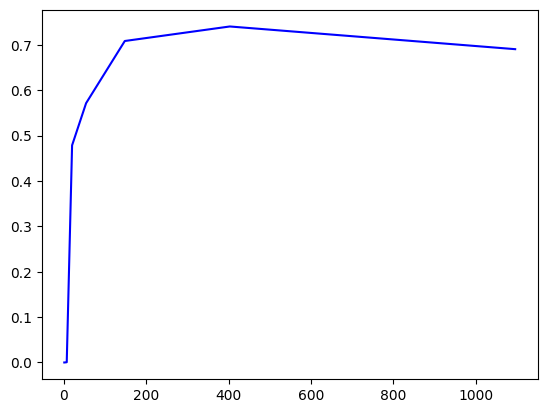

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_values, np_f1_mean, color="blue")
plt.show()

Видим, что при 108 страницах, наша метрика становится $>= 0.7$. Но автор считает, что разумнее выбрать большее число, а именно 403. Выберем Это количество страниц за $n_0$, второй эксперимент будем проводить при данном фиксированном количестве страниц. Соответственно, найдём зависимость. В данном эксперименте уменьшим количество эпох до 3х, чтобы обучение происходило быстрее.

In [ ]:
from transformers import MarkupLMForTokenClassification


torch.cuda.empty_cache()
n_0 = 403
n_experiments = 3
all_f1 = []
f1_scores = []


for k in range(1, 6):
    print(f"-----NUMBER OF UNIQUE WEBSITES : {k}-----")
    mean_f1_scores = []
    for experiment in range(n_experiments):
        torch.cuda.empty_cache()
        train_perm, test_perm = get_perm_k_websites(k=k)
        train_dataloader, test_dataloader = get_dataloaders(train_perm, n_0, test_perm, 50)
        # Training:
        model = MarkupLMForTokenClassification.from_pretrained("microsoft/markuplm-base", id2label=ids_with_labels, label2id=labels_with_ids)
        train_model(model, train_dataloader, 3, True)
        # Saving model:
        print(f"-----saving model!-----")
        torch.save(model.state_dict(), f"/content/drive/MyDrive/SWDE/websites/model_{k}_{experiment}")
        print(f"-----model saved!-----")
        # Testing:
        test_metric = test_model(model, test_dataloader)
        print(test_metric["overall_f1"])
        mean_f1_scores.append(sum([test_metric["address_f1"], test_metric["cuisine_f1"], \
                             test_metric["name_f1"], test_metric["phone_f1"]]) / 4)
    all_f1.append(mean_f1_scores)
    print(all_f1)
    f1_scores.append(sum(mean_f1_scores) / n_experiments)
    print(f1_scores[-1])

-----NUMBER OF UNIQUE WEBSITES : 1-----


Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.005170206073671579
{   'address_f1': 0.0,
    'address_number': 0,
    'address_precision': 0.0,
    'address_recall': 0.0,
    'cuisine_f1': 0.28442437923250563,
    'cuisine_number': 336,
    'cuisine_precision': 0.5887850467289719,
    'cuisine_recall': 0.1875,
    'name_f1': 0.0,
    'name_number': 0,
    'name_precision': 0.0,
    'name_recall': 0.0,
    'other_f1': 0.9786210985930679,
    'other_number': 46960,
    'other_precision': 0.9910688939840594,
    'other_recall': 0.9664821124361158,
    'overall_accuracy': 0.9580494349986373,
    'overall_f1': 0.9580494349986373,
    'overall_precision': 0.9580494349986373,
    'overall_recall': 0.9580494349986373,
    'phone_f1': 0.2622432859399684,
    'phone_number': 403,
    'phone_precision': 0.16644385026737968,
    'phone_recall': 0.6178660049627791}
---Epoch 2:---
Loss: 0.0007352280663326383
{   'cuisine_f1': 0.9305760709010339,
    'cuisine_number': 336,
    'cuisine_precision': 0.9237536656891495,
    'c

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.027606438845396042
{   'address_f1': 0.3731113166820845,
    'address_number': 1287,
    'address_precision': 0.30930470347648265,
    'address_recall': 0.4700854700854701,
    'cuisine_f1': 0.22624434389140272,
    'cuisine_number': 399,
    'cuisine_precision': 0.16181229773462782,
    'cuisine_recall': 0.37593984962406013,
    'name_f1': 0.36556104446012705,
    'name_number': 811,
    'name_precision': 0.4273927392739274,
    'name_recall': 0.3193588162762022,
    'other_f1': 0.9531904593442196,
    'other_number': 54666,
    'other_precision': 0.970520209297035,
    'other_recall': 0.9364687374236271,
    'overall_accuracy': 0.9104459461807064,
    'overall_f1': 0.9104459461807064,
    'overall_precision': 0.9104459461807064,
    'overall_recall': 0.9104459461807064,
    'phone_f1': 0.2329084588644264,
    'phone_number': 400,
    'phone_precision': 0.1515837104072398,
    'phone_recall': 0.5025}
---Epoch 2:---
Loss: 0.013230564072728157
{   'address_f1': 0.

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.036634206771850586
{   'address_f1': 0.13900709219858154,
    'address_number': 592,
    'address_precision': 0.4336283185840708,
    'address_recall': 0.08277027027027027,
    'cuisine_f1': 0.0,
    'cuisine_number': 0,
    'cuisine_precision': 0.0,
    'cuisine_recall': 0.0,
    'name_f1': 0.01152073732718894,
    'name_number': 272,
    'name_precision': 0.006830601092896175,
    'name_recall': 0.03676470588235294,
    'other_f1': 0.9712013165112452,
    'other_number': 40487,
    'other_precision': 0.9805160478288232,
    'other_recall': 0.9620618964111937,
    'overall_accuracy': 0.9433871006747117,
    'overall_f1': 0.9433871006747117,
    'overall_precision': 0.9433871006747117,
    'overall_recall': 0.9433871006747117,
    'phone_f1': 0.0,
    'phone_number': 0,
    'phone_precision': 0.0,
    'phone_recall': 0.0}
---Epoch 2:---
Loss: 0.006684779189527035
{   'address_f1': 0.8756515264333581,
    'address_number': 592,
    'address_precision': 0.782956058

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.003912595100700855
{   'address_f1': 0.0072992700729927005,
    'address_number': 251,
    'address_precision': 0.043478260869565216,
    'address_recall': 0.00398406374501992,
    'cuisine_f1': 0.5023148148148148,
    'cuisine_number': 594,
    'cuisine_precision': 0.8037037037037037,
    'cuisine_recall': 0.3653198653198653,
    'name_f1': 0.22975517890772126,
    'name_number': 667,
    'name_precision': 0.14529575228265185,
    'name_recall': 0.5487256371814093,
    'other_f1': 0.9829003432207507,
    'other_number': 98243,
    'other_precision': 0.9878776038989081,
    'other_recall': 0.977972985352646,
    'overall_accuracy': 0.9661200664273426,
    'overall_f1': 0.9661200664273426,
    'overall_precision': 0.9661200664273426,
    'overall_recall': 0.9661200664273426,
    'phone_f1': 0.7571318427139553,
    'phone_number': 806,
    'phone_precision': 1.0,
    'phone_recall': 0.609181141439206}
---Epoch 2:---
Loss: 0.0009507532231509686
{   'address_f1': 0.5

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.007712427992373705
{   'address_f1': 0.4581370061616528,
    'address_number': 1408,
    'address_precision': 0.46780162842339007,
    'address_recall': 0.44886363636363635,
    'cuisine_f1': 0.2488569562377531,
    'cuisine_number': 785,
    'cuisine_precision': 0.1673254281949934,
    'cuisine_recall': 0.4853503184713376,
    'name_f1': 0.6248421052631579,
    'name_number': 1326,
    'name_precision': 0.7073403241182078,
    'name_recall': 0.5595776772247361,
    'other_f1': 0.9809127909960483,
    'other_number': 127104,
    'other_precision': 0.984398646667776,
    'other_recall': 0.9774515357502518,
    'overall_accuracy': 0.9624182011870339,
    'overall_f1': 0.9624182011870339,
    'overall_precision': 0.9624182011870339,
    'overall_recall': 0.9624182011870339,
    'phone_f1': 0.7321830457614403,
    'phone_number': 797,
    'phone_precision': 0.9104477611940298,
    'phone_recall': 0.6122961104140527}
---Epoch 2:---
Loss: 0.0025187842547893524
{   'add

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.03594348952174187
{   'address_f1': 0.09893048128342247,
    'address_number': 287,
    'address_precision': 0.08026030368763558,
    'address_recall': 0.1289198606271777,
    'cuisine_f1': 0.5967976710334789,
    'cuisine_number': 772,
    'cuisine_precision': 0.6810631229235881,
    'cuisine_recall': 0.5310880829015544,
    'name_f1': 0.684630738522954,
    'name_number': 1220,
    'name_precision': 0.875,
    'name_recall': 0.5622950819672131,
    'other_f1': 0.9825231939647916,
    'other_number': 110426,
    'other_precision': 0.9873526533822279,
    'other_recall': 0.9777407494611776,
    'overall_accuracy': 0.9654379098794161,
    'overall_f1': 0.9654379098794161,
    'overall_precision': 0.9654379098794161,
    'overall_recall': 0.9654379098794161,
    'phone_f1': 0.28466421650517876,
    'phone_number': 743,
    'phone_precision': 0.18933333333333333,
    'phone_recall': 0.5733512786002691}
---Epoch 2:---
Loss: 0.016546867787837982
{   'address_f1': 0.54

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.003579203737899661
{   'address_f1': 0.5485362095531587,
    'address_number': 844,
    'address_precision': 0.7841409691629956,
    'address_recall': 0.4218009478672986,
    'cuisine_f1': 0.210943124550036,
    'cuisine_number': 575,
    'cuisine_precision': 0.13300045392646392,
    'cuisine_recall': 0.5095652173913043,
    'name_f1': 0.6643929058663028,
    'name_number': 938,
    'name_precision': 0.9223484848484849,
    'name_recall': 0.5191897654584222,
    'other_f1': 0.9874857875335848,
    'other_number': 138376,
    'other_precision': 0.989585601277306,
    'other_recall': 0.9853948661617622,
    'overall_accuracy': 0.9751517249662637,
    'overall_f1': 0.9751517249662637,
    'overall_precision': 0.9751517249662637,
    'overall_recall': 0.9751517249662637,
    'phone_f1': 0.7751824817518249,
    'phone_number': 806,
    'phone_precision': 0.9414893617021277,
    'phone_recall': 0.6588089330024814}
---Epoch 2:---
Loss: 0.00936085544526577
{   'address_f

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.01137074176222086
{   'address_f1': 0.5608585145439142,
    'address_number': 2023,
    'address_precision': 0.6541501976284585,
    'address_recall': 0.49085516559565,
    'cuisine_f1': 0.5348837209302325,
    'cuisine_number': 1136,
    'cuisine_precision': 0.5670611439842209,
    'cuisine_recall': 0.5061619718309859,
    'name_f1': 0.7253705318221447,
    'name_number': 1407,
    'name_precision': 0.9379932356257046,
    'name_recall': 0.5913290689410092,
    'other_f1': 0.9860600888097271,
    'other_number': 161441,
    'other_precision': 0.9845196267914812,
    'other_recall': 0.9876053790548869,
    'overall_accuracy': 0.9725254676293421,
    'overall_f1': 0.9725254676293421,
    'overall_precision': 0.9725254676293421,
    'overall_recall': 0.9725254676293421,
    'phone_f1': 0.49781365623948876,
    'phone_number': 1166,
    'phone_precision': 0.4095185390149419,
    'phone_recall': 0.6346483704974271}
---Epoch 2:---
Loss: 0.004216579254716635
{   'addre

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.008913169614970684
{   'address_f1': 0.22613065326633167,
    'address_number': 290,
    'address_precision': 0.4166666666666667,
    'address_recall': 0.15517241379310345,
    'cuisine_f1': 0.7785714285714286,
    'cuisine_number': 1159,
    'cuisine_precision': 0.9525593008739076,
    'cuisine_recall': 0.6583261432269197,
    'name_f1': 0.7384777455886226,
    'name_number': 2038,
    'name_precision': 0.7970437748720864,
    'name_recall': 0.6879293424926398,
    'other_f1': 0.9864805502193141,
    'other_number': 153156,
    'other_precision': 0.9906047957020397,
    'other_recall': 0.982390503800047,
    'overall_accuracy': 0.9732916769855028,
    'overall_f1': 0.9732916769855028,
    'overall_precision': 0.9732916769855028,
    'overall_recall': 0.9732916769855028,
    'phone_f1': 0.32119117256048924,
    'phone_number': 836,
    'phone_precision': 0.2064957264957265,
    'phone_recall': 0.722488038277512}
---Epoch 2:---
Loss: 0.006773180328309536
{   'addr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.015673941001296043
{   'address_f1': 0.6354030974091764,
    'address_number': 3173,
    'address_precision': 0.5875267665952891,
    'address_recall': 0.6917743460447526,
    'cuisine_f1': 0.8093941456773315,
    'cuisine_number': 1690,
    'cuisine_precision': 0.9527243589743589,
    'cuisine_recall': 0.7035502958579881,
    'name_f1': 0.8398352314029561,
    'name_number': 2253,
    'name_precision': 0.924759871931697,
    'name_recall': 0.7691966267199289,
    'other_f1': 0.9896582778311083,
    'other_number': 201896,
    'other_precision': 0.9886896169893026,
    'other_recall': 0.9906288386099774,
    'overall_accuracy': 0.9798205319436989,
    'overall_f1': 0.9798205319436989,
    'overall_precision': 0.9798205319436989,
    'overall_recall': 0.9798205319436989,
    'phone_f1': 0.7986013986013986,
    'phone_number': 1499,
    'phone_precision': 0.8390889052167524,
    'phone_recall': 0.76184122748499}
---Epoch 2:---
Loss: 0.004161046352237463
{   'addres

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.01636146381497383
{   'address_f1': 0.460727969348659,
    'address_number': 914,
    'address_precision': 0.4097103918228279,
    'address_recall': 0.526258205689278,
    'cuisine_f1': 0.7474649927571221,
    'cuisine_number': 1117,
    'cuisine_precision': 0.8113207547169812,
    'cuisine_recall': 0.6929274843330349,
    'name_f1': 0.6793168880455407,
    'name_number': 1500,
    'name_precision': 0.6462093862815884,
    'name_recall': 0.716,
    'other_f1': 0.9918837411702794,
    'other_number': 197851,
    'other_precision': 0.9930042298827284,
    'other_recall': 0.9907657782877014,
    'overall_accuracy': 0.9839865295259164,
    'overall_f1': 0.9839865295259164,
    'overall_precision': 0.9839865295259164,
    'overall_recall': 0.9839865295259164,
    'phone_f1': 0.7496947496947496,
    'phone_number': 1135,
    'phone_precision': 0.6966717095310136,
    'phone_recall': 0.811453744493392}
---Epoch 2:---
Loss: 0.010604999959468842
{   'address_f1': 0.877192

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.017302241176366806
{   'address_f1': 0.6096439364078308,
    'address_number': 3597,
    'address_precision': 0.5779770802192327,
    'address_recall': 0.6449819293855991,
    'cuisine_f1': 0.7661937075879087,
    'cuisine_number': 1902,
    'cuisine_precision': 0.926865671641791,
    'cuisine_recall': 0.6529968454258676,
    'name_f1': 0.7104660045836516,
    'name_number': 1966,
    'name_precision': 0.7113717491075982,
    'name_recall': 0.7095625635808749,
    'other_f1': 0.9862796235400839,
    'other_number': 198355,
    'other_precision': 0.9859193954659949,
    'other_recall': 0.9866401149454261,
    'overall_accuracy': 0.9730124524536107,
    'overall_f1': 0.9730124524536107,
    'overall_precision': 0.9730124524536107,
    'overall_recall': 0.9730124524536107,
    'phone_f1': 0.7254111076636673,
    'phone_number': 1609,
    'phone_precision': 0.7242874845105328,
    'phone_recall': 0.7265382224984462}
---Epoch 2:---
Loss: 0.008237183094024658
{   'addr

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

---Epoch 1:---
Loss: 0.021086417138576508
{   'address_f1': 0.45912437039907017,
    'address_number': 2283,
    'address_precision': 0.41160125043417856,
    'address_recall': 0.519053876478318,
    'cuisine_f1': 0.7908814589665654,
    'cuisine_number': 1912,
    'cuisine_precision': 0.944121915820029,
    'cuisine_recall': 0.680439330543933,
    'name_f1': 0.6991517776574625,
    'name_number': 2628,
    'name_precision': 0.6649502231376587,
    'name_recall': 0.737062404870624,
    'other_f1': 0.9899984545073189,
    'other_number': 271729,
    'other_precision': 0.9898928204807441,
    'other_recall': 0.9901041110812611,
    'overall_accuracy': 0.9802431719318263,
    'overall_f1': 0.9802431719318263,
    'overall_precision': 0.9802431719318263,
    'overall_recall': 0.9802431719318263,
    'phone_f1': 0.8537085898563472,
    'phone_number': 1908,
    'phone_precision': 0.9687292082501663,
    'phone_recall': 0.7631027253668763}
---Epoch 2:---
Loss: 0.01971634477376938
{   'addres

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'ptc_cls.weight', 'nrp_cls.decoder.weight', 'nrp_cls.decoder.bias', 'nrp_cls.LayerNorm.bias', 'cls.predictions.bias', 'nrp_cls.dense.bias', 'ptc_cls.bias', 'cls.predictions.transform.dense.bias', 'nrp_cls.dense.weight', 'cls.predictions.decoder.weight', 'markuplm.pooler.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

In [ ]:
# Here I will put ready numbers:

all_f1 = [[0.09219858156028368, 0.3567237334260801, 0.006125574272588055],
 [0.01352565530142752, 0.6463577038068966, 0.42298263667561053],
 [0.06310735028697698, 0.7860501337517966, 0.5226938075677114],
 [0.7841453397239679, 0.5661911180822511, 0.74697915231028],
 [0.7850704381784355, 0.7923127734588685, 0.6090836025066066],
[0.7999282125703492, 0.7815597108592948, 0.7456437677687873],
[0.6382309202761453, 0.8176477102529432, 0.8303905193668972],
 [0.619472847080209, 0.6355569268907653, 0.6009340545038486],
 [0.6863518069187389, 0.7104807473228525, 0.8864845379492579]]
all_f1

[[0.09219858156028368, 0.3567237334260801, 0.006125574272588055],
 [0.01352565530142752, 0.6463577038068966, 0.42298263667561053],
 [0.06310735028697698, 0.7860501337517966, 0.5226938075677114],
 [0.7841453397239679, 0.5661911180822511, 0.74697915231028],
 [0.7850704381784355, 0.7923127734588685, 0.6090836025066066],
 [0.7999282125703492, 0.7815597108592948, 0.7456437677687873],
 [0.6382309202761453, 0.8176477102529432, 0.8303905193668972],
 [0.619472847080209, 0.6355569268907653, 0.6009340545038486],
 [0.6863518069187389, 0.7104807473228525, 0.8864845379492579]]

In [ ]:
import numpy as np

f1_scores = [np.mean(el) for el in all_f1]

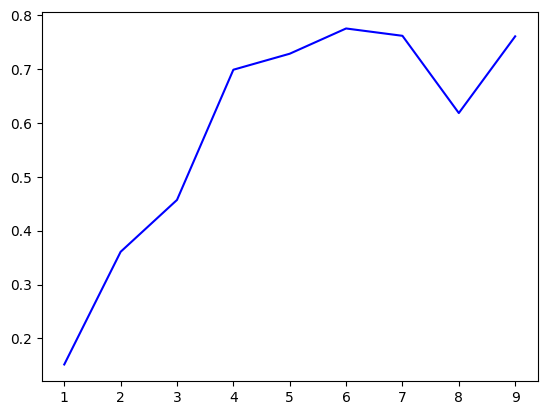

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10), f1_scores, color="blue")
plt.show()

In [ ]:
f1_scores

[0.15168262975298394,
 0.3609553319279783,
 0.45728376386882835,
 0.6991052033721664,
 0.7288222713813036,
 0.7757105637328104,
 0.7620897166319952,
 0.6186546094916077,
 0.7611056973969497]

Давайте посмотрим, как работает наша дообученная модель. Для этого выберем модель, которая показала наилучший результат в последнем эксперименте. В нашем случае, это модель, обучавшаяся на шести случайных вебсайтах с 403 страницами на каждом из них.

Выберем случайную модель, удовлетворяющую выдвинутым условиям, из имеющихся. Сделаем это "случайно".

In [ ]:
from random import randint

print(randint(1, 3))

3


Итак, выберем модель 3 (кодовый название - model_6_2) и посмотрим, как она предсказывает данные со случайного вебсайта из датасета.

Загрузим модель.

In [ ]:
from transformers import MarkupLMForTokenClassification
import torch

model = MarkupLMForTokenClassification.from_pretrained("microsoft/markuplm-base", id2label=ids_with_labels, label2id=labels_with_ids)
model.load_state_dict(torch.load("/content/drive/MyDrive/SWDE/websites/model_6_2", map_location=torch.device('cpu')))

Some weights of the model checkpoint at microsoft/markuplm-base were not used when initializing MarkupLMForTokenClassification: ['cls.predictions.decoder.bias', 'nrp_cls.dense.weight', 'nrp_cls.decoder.bias', 'ptc_cls.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'ptc_cls.bias', 'cls.predictions.decoder.weight', 'nrp_cls.LayerNorm.weight', 'markuplm.pooler.dense.bias', 'nrp_cls.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'nrp_cls.LayerNorm.bias', 'nrp_cls.decoder.weight', 'cls.predictions.transform.dense.weight', 'markuplm.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MarkupLMForTokenClassification from the checkpoint of a model that 

<All keys matched successfully>

Обработаем входную страницу.

In [ ]:
from transformers import MarkupLMFeatureExtractor
from torch.utils.data import DataLoader

feature_extractor = MarkupLMFeatureExtractor()


data = []
with open(f"/content/drive/MyDrive/SWDE/0000.htm") as html_page:
    html_code = html_page.read()
encoding = feature_extractor(html_code)
node_labels = [[]]
for node_text in encoding['nodes'][0]:
    if node_text == "Frontier Restaurant":
        node_labels[0].append(labels_with_ids["name"])
    elif node_text in ["2400 Central Ave SE", "Albuquerque, NM 87106"]:
        node_labels[0].append(labels_with_ids["address"])
    elif node_text == "(505) 266-0550":
        node_labels[0].append(labels_with_ids["phone"])
    elif node_text in ["Diner", "New Mexican"]:
        node_labels[0].append(labels_with_ids["cuisine"])
    else:
        node_labels[0].append(labels_with_ids["other"])
    
nodes = encoding['nodes']
xpaths = encoding['xpaths']

In [ ]:
from transformers import MarkupLMProcessor


processor = MarkupLMProcessor.from_pretrained("microsoft/markuplm-base")
processor.parse_html = False


encoding = processor(nodes=nodes, xpaths=xpaths, node_labels=node_labels,
                     padding="max_length", max_length=512, return_offsets_mapping=True,
                     return_tensors="pt", truncation=True).to("cpu")
offset_mapping = encoding.pop("offset_mapping")
labels = encoding.pop("labels")

Получаем выход из нейронной сети.

In [ ]:
with torch.no_grad():
    outputs = model(**encoding)

In [ ]:
predictions = outputs.logits.argmax(-1)
print(predictions)

tensor([[4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4

Резульататы наглядно.

In [ ]:
results = {"Node": [], "Predicted": [], "Ground truth": []}

for pred_id, word_id, offset, label_id in zip(predictions[0].tolist(), encoding.word_ids(0), offset_mapping[0].tolist(), labels[0].tolist()):
  if word_id is not None and offset[0] == 0:
    if pred_id != 4 or label_id != 4:
        print(f"Node: {nodes[0][word_id]}")
        print(f"Predicted: {ids_with_labels[pred_id]}")
        print(f"Ground truth: {ids_with_labels[label_id]}")
        print("----------")
        results["Node"].append(nodes[0][word_id])
        results["Predicted"].append(ids_with_labels[pred_id])
        results["Ground truth"].append(ids_with_labels[label_id])

Node: Albuquerque
Predicted: address
Ground truth: other
----------
Node: Albuquerque
Predicted: address
Ground truth: other
----------
Node: Frontier Restaurant
Predicted: name
Ground truth: name
----------
Node: (505) 266-0550
Predicted: phone
Ground truth: phone
----------
Node: 2400 Central Ave SE
Predicted: other
Ground truth: address
----------
Node: Albuquerque
Predicted: address
Ground truth: other
----------
Node: NM
Predicted: address
Ground truth: other
----------
Node: 87106
Predicted: address
Ground truth: other
----------
Node: Diner
Predicted: cuisine
Ground truth: cuisine
----------
Node: New Mexican
Predicted: other
Ground truth: cuisine
----------


Итак, в итоге мы произвели дообучение модели-трансформера MarkupLM на вертикали "restaurant" из датасета SWDE.\
Мы проанализировали качество извлечения страниц в зависимости от количества вебсайтов и от количества страниц, взятых с каждого вебсайта. \
Мы также построили графики, из которых можно наглядно увидеть эти зависимости. \
Было решено множество проблем как технического, так и реализационного характера.